# Testing a Rainfall Region Classifier

This notebook demonstrates:

1) Reading in training and testing data

2) Examining pertinent rainfall region features

3) Passing these features into a random forest classifier

4) Basic assessment of the classifier

5) Exploring the feature space to see how this modifies the classification

CSV files for this example are in the "../data/training" folder.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = 10, 10

data_loc = "../data"

In [2]:
df_train = pd.read_csv(data_loc + "/training/sample_train_data.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 25 columns):
datetime                       399 non-null object
index                          399 non-null int64
filename                       399 non-null object
mean_intensity                 399 non-null float64
solidity                       399 non-null float64
intensity_variance             399 non-null float64
intense_convection_ratio       399 non-null float64
convection_stratiform_ratio    399 non-null float64
area                           399 non-null int64
convection_area                399 non-null int64
max_intensity                  399 non-null int64
minor_axis_length              399 non-null float64
intense_area                   399 non-null int64
eccentricity                   399 non-null float64
convex_area                    399 non-null int64
intense_stratiform_ratio       399 non-null float64
major_axis_length              399 non-null float64
label                    

In [3]:
df_test = pd.read_csv(data_loc + "/training/sample_test_data.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 25 columns):
datetime                       100 non-null object
index                          100 non-null int64
filename                       100 non-null object
mean_intensity                 100 non-null float64
solidity                       100 non-null float64
intensity_variance             100 non-null float64
intense_convection_ratio       100 non-null float64
convection_stratiform_ratio    100 non-null float64
area                           100 non-null int64
convection_area                100 non-null int64
max_intensity                  100 non-null int64
minor_axis_length              100 non-null float64
intense_area                   100 non-null int64
eccentricity                   100 non-null float64
convex_area                    100 non-null int64
intense_stratiform_ratio       100 non-null float64
major_axis_length              100 non-null float64
label                     

# These vectors are associated with the following features...

In [4]:
feature_list = ['area', 'convex_area', 'eccentricity', 
                'intense_area', 'convection_area',
                'convection_stratiform_ratio', 'intense_stratiform_ratio',
                'intense_convection_ratio', 'mean_intensity', 'max_intensity',
                'intensity_variance', 'major_axis_length', 'minor_axis_length',
                'solidity']

# ... and the following labels

In [5]:
labels = ['MCS', 'Unorganized', 'Tropical', 'Synoptic', 'Clutter']

In [6]:
df_train['label_name'] = [labels[x] for x in df_train.label.values]
df_test['label_name'] = [labels[x] for x in df_test.label.values]

df_train.head()

,datetime,index,filename,mean_intensity,solidity,intensity_variance,intense_convection_ratio,convection_stratiform_ratio,area,convection_area,...,intense_stratiform_ratio,major_axis_length,label,minor_major_ratio,xmax,xmin,ymax,ymin,label1,label_name
0,2008-07-06 06:25:00,1292,extracted/mcs_files/mcs_BREF_080706_0625_000.png,28.275568,0.643510,83.110615,0.308452,0.172538,21120,3644,...,0.053220,359.772021,0,0.260919,1966,1828,290,145,1,MCS
1,2013-06-09 19:35:00,1772,extracted/mcs_files/mcs_BREF_130609_1935_001.png,31.102197,0.458959,70.989211,0.201437,0.220508,58084,12808,...,0.044418,501.497502,0,0.435192,1948,1679,1412,1199,1,MCS
2,2010-08-20 03:10:00,1552,extracted/mcs_files/mcs_BREF_100820_0310_001.png,31.347850,0.559617,89.086667,0.230869,0.277488,22228,6168,...,0.064063,256.749168,0,0.595245,2704,2583,1058,948,1,MCS
3,2011-06-20 10:05:00,1592,extracted/mcs_files/mcs_BREF_110620_1005_002.png,26.587559,0.287222,55.918631,0.246973,0.081171,40704,3304,...,0.020047,524.874712,0,0.455835,1448,1147,847,669,1,MCS
4,2007-06-18 22:35:00,1110,extracted/mcs_files/mcs_BREF_070618_2235_000.png,30.214721,0.597247,60.598419,0.181799,0.168044,110376,18548,...,0.030550,789.889039,0,0.275361,2238,1915,610,280,1,MCS


Text(0,0.5,'km $^2$')

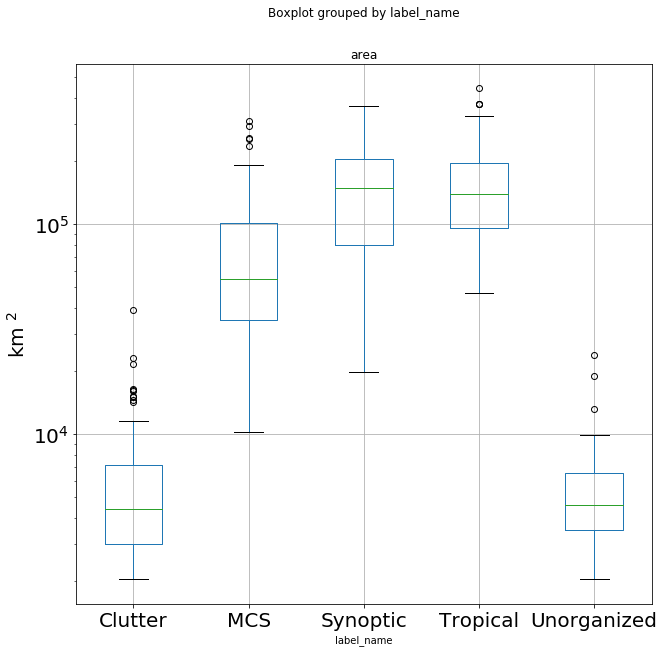

In [7]:
ax = df_train.boxplot(column='area', by='label_name', figsize=(10,10), fontsize=20)

ax.set_yscale('log')
ax.set_ylabel("km $^2$", fontsize=20)

Text(0,0.5,'Mean dBZ')

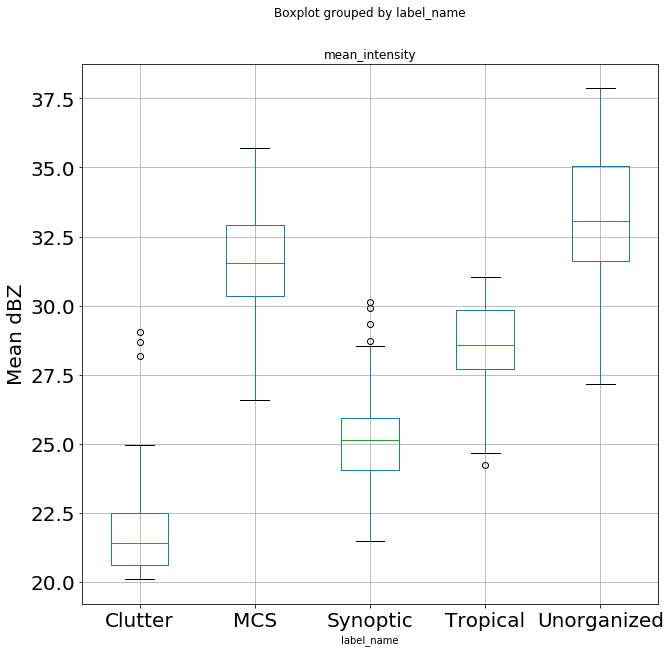

In [8]:
ax = df_train.boxplot(column='mean_intensity', by='label_name', figsize=(10,10), fontsize=20)
ax.set_ylabel("Mean dBZ",fontsize=20)

# Build Random Forest Classifier and Examine Performance Metrics

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf_clf = RandomForestClassifier(random_state=42)

rf_clf.fit(df_train[['area', 'mean_intensity']].values, df_train.label.values)

predicted = rf_clf.predict(df_test[['area', 'mean_intensity']].values)
expected = df_test.label.values

print("Classification report for classifier %s:\n%s\n"
      % (rf_clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       0.84      0.80      0.82        20
          1       1.00      0.80      0.89        20
          2       0.64      0.80      0.71        20
          3       0.75      0.60      0.67        20
          4       0.79      0.95      0.86        20

avg / total       0.80      0.79      0.79       100


Confusion matrix:
[[16  0  3  0  1]
 [ 1 16  0  0  3]
 [ 1  0 16  3  0]
 [ 1  0  6 12  1]
 [ 0  0  0  1 19]]


In [10]:
plt.rcParams['figure.figsize'] = 14, 14
from ipywidgets.widgets import FloatSlider as fs
from ipywidgets import interact, Layout

plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20

df = pd.concat([df_train, df_test])

labels= ['MCS', 'Unorganized', 'Tropical', 'Synoptic', 'Clutter']

def get_label_2f(area=fs(value=10000, min=1000, max=500000, 
                      description='Area',
                      continuous_update=False),
                 mean_intensity=fs(value=30, min=20, max=40, 
                                description='Mean Intensity',
                                continuous_update=False)):
    
    
    vector = np.array([area, mean_intensity])

    class_name = rf_clf.predict(vector.reshape(1,-1))[0]
    proba = rf_clf.predict_proba(vector.reshape(1,-1))[0]
    
    perc = float(proba[np.argmax(proba)])*100
    
    for color, label in zip(['r', 'g', 'b', 'y', 'k'], labels):
              
        t_df = df[df.label_name==label]
        plt.scatter(t_df.area, t_df.mean_intensity, c=color, label=label)


    plt.xscale('symlog')
    plt.legend(prop={'size':20})
    plt.xlim(1000, 600000)
    plt.title(labels[class_name] +  ": %.1f" % perc + '%', fontsize=30)
    plt.ylabel("Mean Intensity (dBZ)", fontsize=30)
    plt.xlabel("Area (" + r'$km^2$' + ")", fontsize=30)
    
    plt.plot(area, mean_intensity, 'w*', markersize=80)
    plt.plot(area, mean_intensity, 'm*', markersize=50)

    
interact(get_label_2f)

interactive(children=(FloatSlider(value=10000.0, continuous_update=False, description='Area', max=500000.0, mi…

<function __main__.get_label_2f(area=FloatSlider(value=10000.0, continuous_update=False, description='Area', max=500000.0, min=1000.0), mean_intensity=FloatSlider(value=30.0, continuous_update=False, description='Mean Intensity', max=40.0, min=20.0))>

In [11]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(df_train[feature_list].values, df_train.label.values)

predicted = rf_clf.predict(df_test[feature_list].values)
expected = df_test.label.values

print("Classification report for classifier %s:\n%s\n"
      % (rf_clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       1.00      0.90      0.95        20
          1       0.94      0.80      0.86        20
          2       0.85      0.85      0.85        20
          3       0.85      0.85      0.85        20
          4       0.80      1.00      0.89        20

avg / total       0.89      0.88      0.88       100


Confusion matrix:
[[18  1  1  0  0]
 [ 0 16  0  0  4]
 [ 0  0 17  3  0]
 [ 0  0  2 17  1]
 [ 0  0  0  0 20]]


In [12]:
import pickle

pickle.dump(rf_clf, open(data_loc + "/classifiers/my_random_forest.pkl", "wb"))